In [4]:
!pip install xgboost

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [7]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [17]:
train_df_2 = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [19]:
df.to_csv('s3://sagemaker-us-east-1-907945428139/aifa-team-purple/dataset/cleaned-dataset/file-name.csv', index=False)

In [14]:
from io import StringIO
import boto3
import sagemaker

In [18]:
prefix = "aifa-team-purple/dataset/cleaned-dataset"
sess = sagemaker.Session()

csv_buffer = StringIO()
train_df_2.to_csv(csv_buffer)

uri = sess.upload_data(path="train_data.csv", key_prefix=prefix)
print(uri)

FileNotFoundError: [Errno 2] No such file or directory: 'train_data_2.csv'

In [13]:
bucket = 'aifa-team-purple/'

csv_buffer = StringIO()
train_df_2.to_csv(csv_buffer)

s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, 'train_df.csv').put(Body=csv_buffer.getvalue())

ParamValidationError: Parameter validation failed:
Invalid bucket name "aifa-team-purple/dataset/cleaned-dataset": Bucket name must match the regex "^[a-zA-Z0-9.\-_]{1,255}$" or be an ARN matching the regex "^arn:(aws).*:(s3|s3-object-lambda):[a-z\-0-9]+:[0-9]{12}:accesspoint[/:][a-zA-Z0-9\-]{1,63}$|^arn:(aws).*:s3-outposts:[a-z\-0-9]+:[0-9]{12}:outpost[/:][a-zA-Z0-9\-]{1,63}[/:]accesspoint[/:][a-zA-Z0-9\-]{1,63}$"

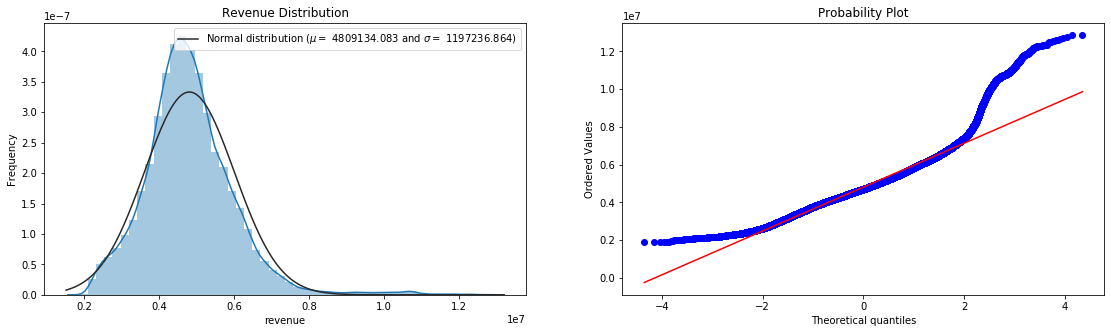

In [11]:
(mu, sigma) = norm.fit(train_df['revenue'])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(train_df['revenue'] , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Revenue Distribution')
ax2 = stats.probplot(train_df['revenue'], plot=plt)
f.show();

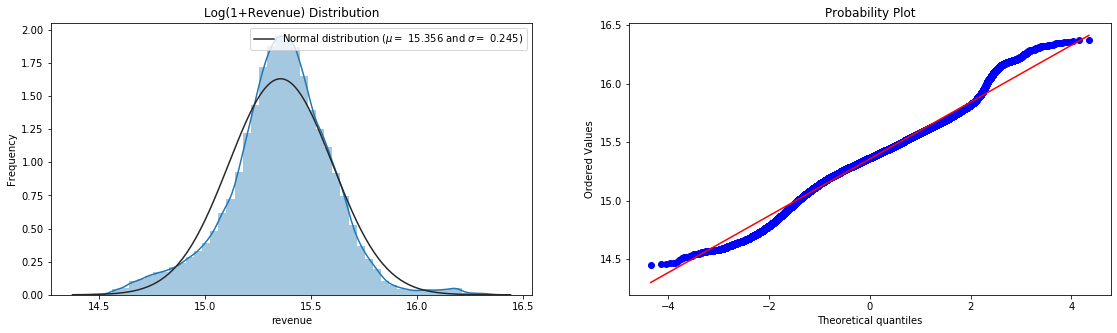

In [8]:
(mu, sigma) = norm.fit(np.log1p(train_df['revenue']))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(np.log1p(train_df['revenue']) , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Log(1+Revenue) Distribution')
ax2 = stats.probplot(np.log(train_df['revenue']), plot=plt)
f.show();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ca2535e90>,
      dtype=object)

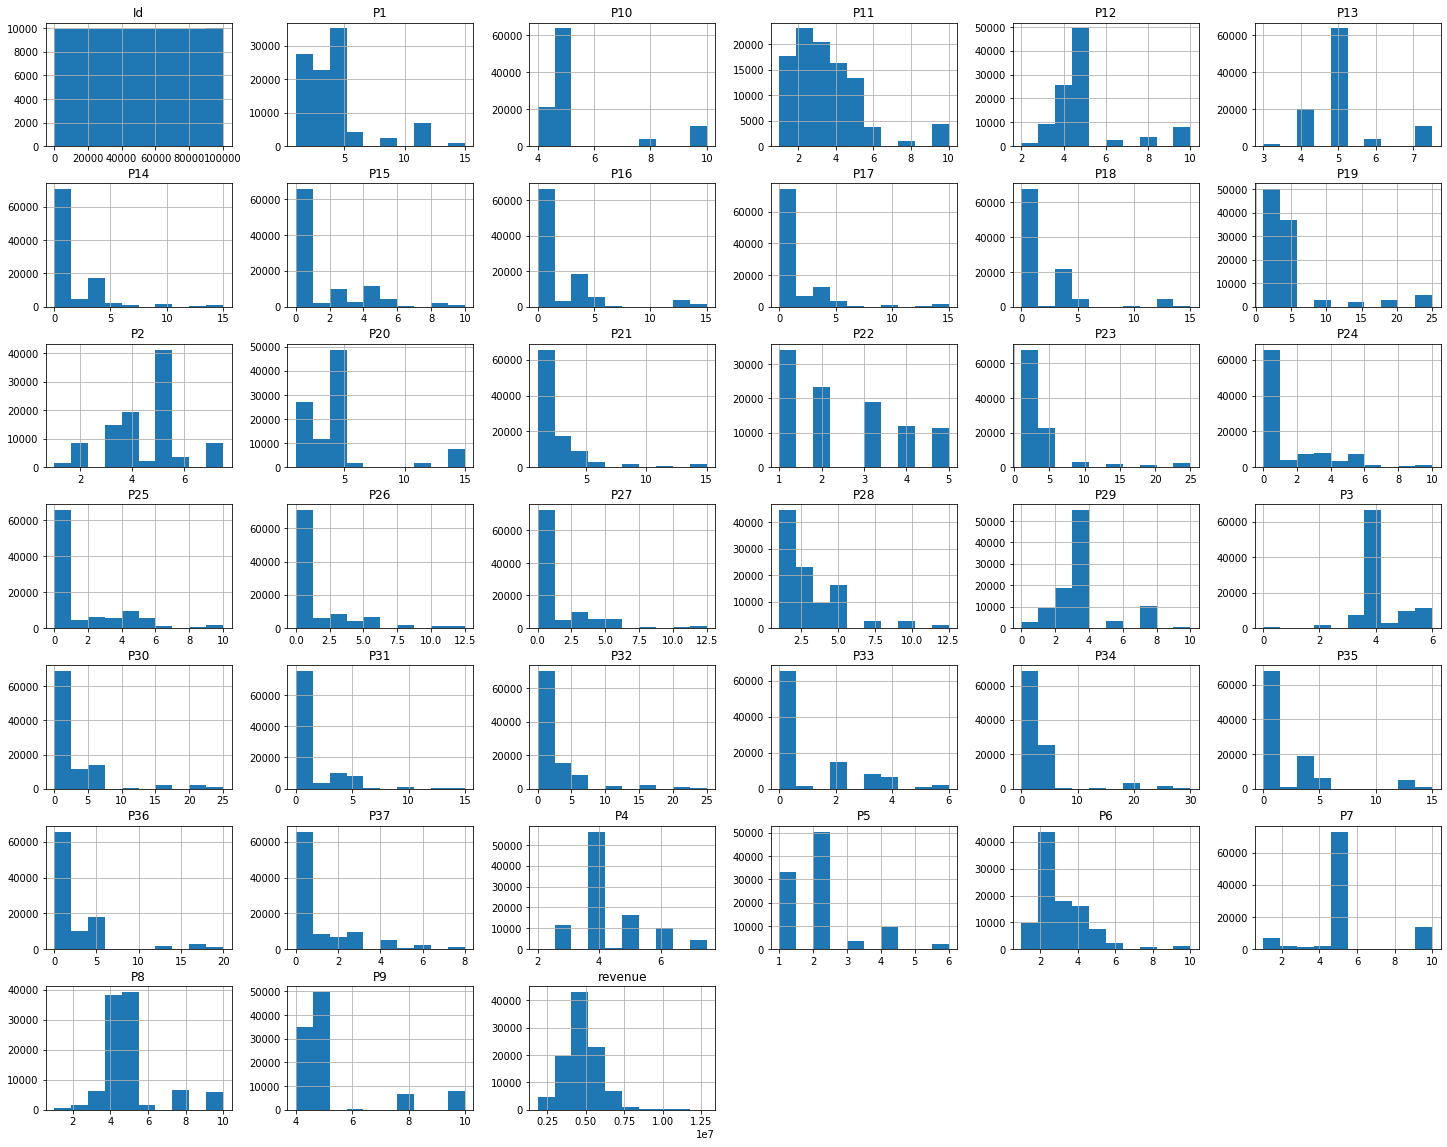

In [6]:
train_df.hist(bins=10, figsize=(25, 20))

In [27]:
for col in train_df[['P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24']]:
    print(train_df[col].unique())

[ 3  4  5  6  8 10  2]
[4.  5.  7.5 6.  3. ]
[ 0  1  2  3  4  6 12  5  9 15]
[ 0  4  8  3  2  5  1 10  6]
[ 0  5  4  1  3  2 15 12  6]
[ 2  0  1  3  9  4  5 15 12  6]
[ 0  4  9  1  3 12 15  5  2]
[ 5  4  1  2  3 25 20 10 15]
[ 5  4 15  3  1 12  2  6  9]
[ 3  5  2  1  6 15  4  9 12]
[1 2 5 3 4]
[ 4  1  5  2  3 10 15 25 20]
[ 0  2  3  5  4  1 10  6  8]


In [23]:
train_df.iloc[:, 1]

0        01/22/2011
1        03/18/2011
2        10/30/2013
3        05/06/2013
4        07/31/2013
            ...    
99705    01/05/2000
99706    07/18/2011
99707    12/29/2012
99708    10/12/2013
99709    10/05/2010
Name: Open Date, Length: 99710, dtype: object

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


imp_train = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=1)
imp_test = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=2)

p_data = ['P'+str(i) for i in range(1,38)]
train_df[p_data] = np.round(imp_train.fit_transform(train_df[p_data]))
test_df[p_data] = np.round(imp_test.fit_transform(test_df[p_data]))

KeyboardInterrupt: 

In [35]:
columnsToEncode = train_df.select_dtypes(include=[object]).columns
train_df_new = pd.get_dummies(train_df, columns=columnsToEncode, drop_first=False)

train_df
train_df_new

Id  P1   P2   P3   P4  P5  P6  P7  P8  P9  ...  City_Çankırı  \
0          0   1  4.0  4.0  4.0   1   2   5   4   5  ...             0   
1          1   3  4.0  4.0  4.0   2   2   5   3   4  ...             0   
2          2   3  4.0  4.0  4.0   2   2   5   4   4  ...             0   
3          3   2  4.0  4.0  4.0   2   3   5   4   5  ...             0   
4          4   2  4.0  4.0  4.0   1   2   5   4   5  ...             0   
...      ...  ..  ...  ...  ...  ..  ..  ..  ..  ..  ...           ...   
99705  99995   5  5.0  4.0  4.0   2   2   5   5   4  ...             0   
99706  99996   1  2.0  4.0  3.0   1   1   1   5   5  ...             0   
99707  99997   4  5.0  4.0  4.0   1   2   5   3   4  ...             0   
99708  99998  12  7.5  6.0  6.0   4   4  10  10  10  ...             0   
99709  99999   2  5.0  4.0  4.0   2   2   5   5   5  ...             0   

       City_Çorum  City_İstanbul  City_İzmir  City_Şanlıurfa  \
0               0              0           0               0   
1               0              0           0               0   
2               0              0           0               0   
3               0              0           0               0   
4               0              0           0               0   
...           ...            ...         ...             ...   
99705           0              0           0               0   
99706           0              0           0               0   
99707           0              1           0               0   
99708           0              1           0               0   
99709           0              1           0               0   

       City Group_Big Cities  City Group_Other  Type_DT  Type_FC  Type_IL  
0                          0                 1        0        1        0  
1                          0                 1        0        0        1  
2                          1                 0        0        1        0  
3                          0                 1        0        0        1  
4                          0                 1        0        1        0  
...                      ...               ...      ...      ...      ...  
99705                      0                 1        0        1        0  
99706                      0                 1        0        0        1  
99707                      1                 0        0        0        1  
99708                      1                 0        0        1        0  
99709                      1                 0        0        0        1  

[99710 rows x 411 columns]

In [36]:
train_df

Id   Open Date            City  City Group Type  P1   P2   P3   P4  \
0          0  01/22/2011           Niğde       Other   FC   1  4.0  4.0  4.0   
1          1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   
2          2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   
3          3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   
4          4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   
...      ...         ...             ...         ...  ...  ..  ...  ...  ...   
99705  99995  01/05/2000         Antalya       Other   FC   5  5.0  4.0  4.0   
99706  99996  07/18/2011           Niğde       Other   IL   1  2.0  4.0  3.0   
99707  99997  12/29/2012        İstanbul  Big Cities   IL   4  5.0  4.0  4.0   
99708  99998  10/12/2013        İstanbul  Big Cities   FC  12  7.5  6.0  6.0   
99709  99999  10/05/2010        İstanbul  Big Cities   IL   2  5.0  4.0  4.0   

       P5  ...  P29  P30  P31  P32  P33  P34  P35  P36  P37       revenue  
0       1  ...  3.0    0    0    0    0    0    0    0    0  4.244606e+06  
1       2  ...  3.0    0    0    0    0    0    0    0    0  3.287352e+06  
2       2  ...  3.0    0    0    0    0    0    0    0    0  4.219404e+06  
3       2  ...  3.0    0    4    0    0    0    0    0    0  3.937159e+06  
4       1  ...  3.0    0    0    0    0    0    0    0    0  5.877729e+06  
...    ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...           ...  
99705   2  ...  3.0    0    0    0    0    0    0    0    0  4.575160e+06  
99706   1  ...  3.0    5    0    0    0    4    0    0    0  2.513131e+06  
99707   1  ...  1.0    5    5    3    2    4    4    4    2  4.410235e+06  
99708   4  ...  5.0    0    0    0    4    0    0    0    0  4.473647e+06  
99709   2  ...  3.0    0    2    0    2    2    4    2    0  5.625029e+06  

[99710 rows x 43 columns]

In [46]:
main_list = np.setdiff1d(test_df.City,train_df.City)
main_list

array(['Amasya', 'Elazığ', 'Karabük', 'Kastamonu', 'Osmaniye', 'Tokat'],
      dtype=object)

In [45]:
result =  all(elem in test_df.City for elem in train_df.City)
result

False